In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv(r"C:\Users\parin\Downloads\assessment_da25.csv")
df.head()

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
0,A,5,0.0,0,2,74,0
1,A,4,0.0,4,1,21,1
2,A,4,0.0,2,0,1,2
3,A,5,0.0,0,1,26,3
4,A,5,0.0,3,3,46,4


In [3]:
df.groupby('Variant')[['GMV (in $)','Time on Page (sec)','Number of add to cart','Clicks on media']].agg(['sum','mean','std'])

GMV (in $)                     Time on Page (sec)                     \
               sum     mean        std                sum    mean        std   
Variant                                                                        
A          7689.99  7.68999  26.794816              20543  20.543  20.596076   
B          9289.53  9.28953  28.879687              20047  20.047  19.319784   

        Number of add to cart                  Clicks on media         \
                          sum   mean       std             sum   mean   
Variant                                                                 
A                        1884  1.884  1.297778            1495  1.495   
B                        2469  2.469  1.660662            1324  1.324   

                   
              std  
Variant            
A        1.230239  
B        1.180855

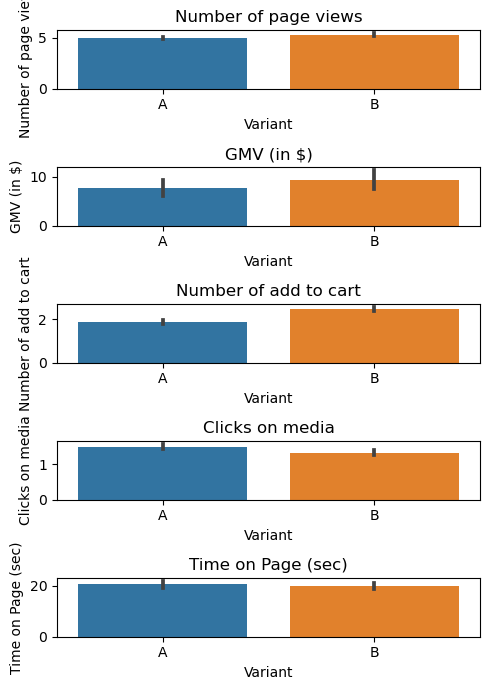

In [5]:
metrics = ['Number of page views', 'GMV (in $)', 'Number of add to cart', 'Clicks on media', 'Time on Page (sec)']

fig, axes = plt.subplots(len(metrics), 1, figsize=(5, 7))

for i, metric in enumerate(metrics):
    sns.barplot(ax=axes[i], x='Variant', y=metric, data=df)
    axes[i].set_title(metric)

plt.tight_layout()
plt.show()


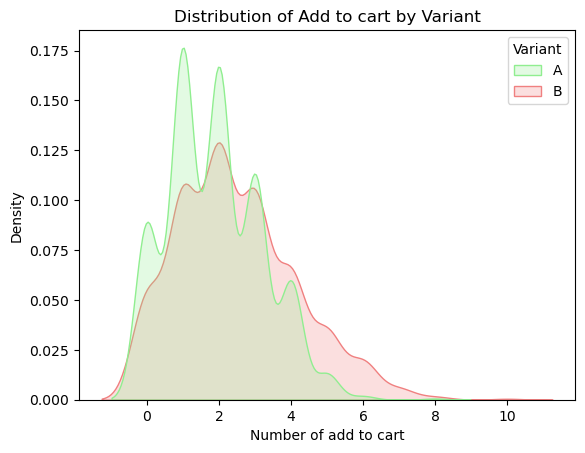

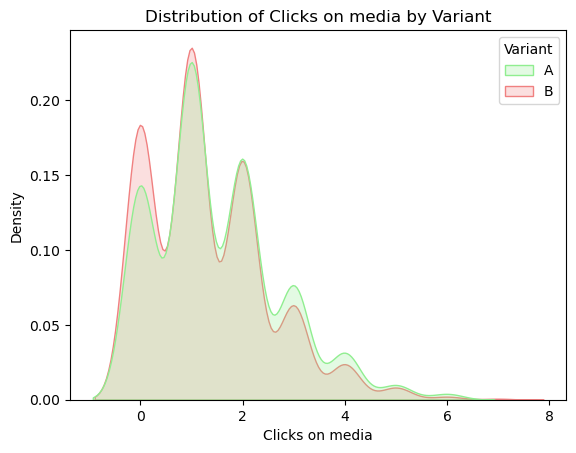

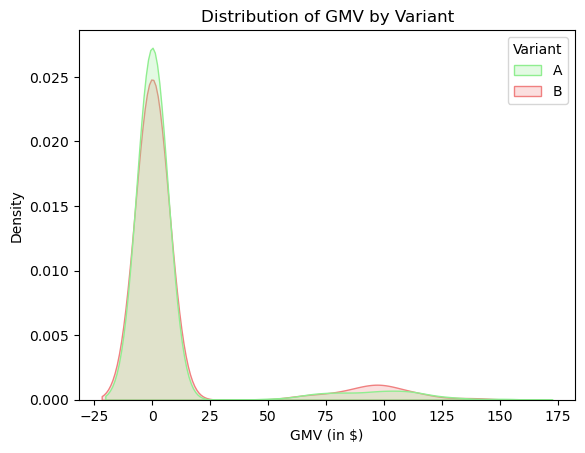

In [9]:
# Set custom colors for each variant
palette_colors = {'A': 'lightgreen', 'B': 'lightcoral'}

# Visualizing the distribution of metrics by variant using KDE plots
sns.kdeplot(x='Number of add to cart', hue='Variant', data=df, fill=True, palette=palette_colors)
plt.title('Distribution of Add to cart by Variant')
plt.show()

sns.kdeplot(x='Clicks on media', hue='Variant', data=df, fill=True, palette=palette_colors)
plt.title('Distribution of Clicks on media by Variant')
plt.show()

sns.kdeplot(x='GMV (in $)', hue='Variant', data=df, fill=True, palette=palette_colors)
plt.title('Distribution of GMV by Variant')
plt.show()



In [11]:
from scipy.stats import ttest_ind
from pprint import pprint

# Split data into Variant A and Variant B
variant_a = df[df['Variant'] == 'A']
variant_b = df[df['Variant'] == 'B']

# Dictionary to store t-test results
test_results = {}

# List of metrics
metrics = ['Number of page views', 'GMV (in $)', 'Number of add to cart', 'Clicks on media', 'Time on Page (sec)']

# Perform t-test for each metric
for metric in metrics:
    stat, p = ttest_ind(variant_a[metric], variant_b[metric], equal_var=False)
    test_results[metric] = {'statistic': stat, 'p-value': p}

# Display t-test results
pprint(test_results)


{'Clicks on media': {'p-value': 0.001541857715988478,
                     'statistic': 3.1710702328903153},
 'GMV (in $)': {'p-value': 0.19930776178517312,
                'statistic': -1.2839539769831623},
 'Number of add to cart': {'p-value': 3.668898697938531e-18,
                           'statistic': -8.777389396187948},
 'Number of page views': {'p-value': 0.001454076157215842,
                          'statistic': -3.1881645133877003},
 'Time on Page (sec)': {'p-value': 0.5786630478332149,
                        'statistic': 0.5554299489081426}}


In [13]:
from scipy.stats import ttest_ind

# Extract data for Clicks on media
click_variant_a = df.loc[df['Variant'] == 'A', 'Clicks on media']
click_variant_b = df.loc[df['Variant'] == 'B', 'Clicks on media']
t_stat_click, p_value_click = ttest_ind(click_variant_a, click_variant_b)

# Extract data for Number of add to cart
add_cart_variant_a = df.loc[df['Variant'] == 'A', 'Number of add to cart']
add_cart_variant_b = df.loc[df['Variant'] == 'B', 'Number of add to cart']
t_stat_add_cart, p_value_add_cart = ttest_ind(add_cart_variant_a, add_cart_variant_b)

# Display test results
print(f'Test for Clicks on media - t-statistic: {t_stat_click}, p-value: {p_value_click}')
print(f'Test for Add to Cart - t-statistic: {t_stat_add_cart}, p-value: {p_value_add_cart}')

# Check for statistical significance
if p_value_click < 0.05 and p_value_add_cart < 0.05:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference observed.")


Test for Clicks on media - t-statistic: 3.1710702328903153, p-value: 0.0015418189281850277
Test for Add to Cart - t-statistic: -8.777389396187946, p-value: 3.517078745065221e-18
Reject the null hypothesis. There is a significant difference.
